In [10]:
import yfinance as yf

# Using the Ticker function to create a ticker object for Tesla
ticker_symbol = 'TSLA'
tesla_ticker = yf.Ticker(ticker_symbol)

# Extracting stock information and saving it in a dataframe named tesla_data
tesla_data = tesla_ticker.history(period='max')

# Resetting the index
tesla_data.reset_index(inplace=True)

# Displaying the first five rows of the tesla_data dataframe
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


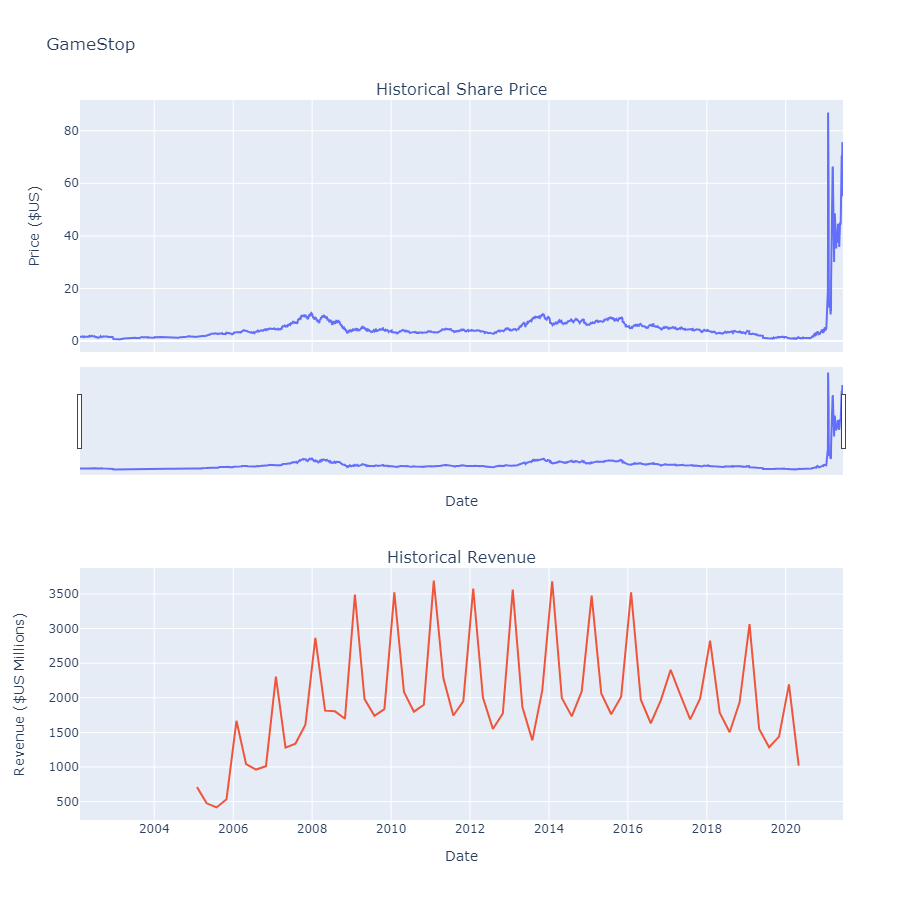

In [11]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Step 1: Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text

# Step 2: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Step 3: Extract the table with GameStop Revenue
tables = soup.find_all('table')
gme_table = None

for table in tables:
    if 'GameStop Quarterly Revenue' in str(table):
        gme_table = table
        break

# Convert the HTML table into a DataFrame
gme_revenue = pd.read_html(str(gme_table))[0]

# Step 4: Clean the DataFrame
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Step 5: Use the Ticker function to extract GameStop stock data
ticker_symbol = 'GME'
gme_ticker = yf.Ticker(ticker_symbol)
gme_data = gme_ticker.history(period='max')

# Step 6: Filter data up to June 2021
gme_data = gme_data[gme_data.index <= '2021-06-30']

# Step 7: Reset the index and display the first five rows
gme_data.reset_index(inplace=True)
print(gme_data.head())

# Function to make the graph
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(
        rows=2, cols=1, 
        shared_xaxes=True, 
        subplot_titles=("Historical Share Price", "Historical Revenue"), 
        vertical_spacing=0.3
    )
    
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), 
            y=stock_data_specific.Close.astype("float"), 
            name="Share Price"
        ), 
        row=1, col=1
    )
    
    fig.add_trace(
        go.Scatter(
            x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), 
            y=revenue_data_specific.Revenue.astype("float"), 
            name="Revenue"
        ), 
        row=2, col=1
    )
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )
    
    fig.show()

# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')


In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Use the requests library to download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Using BeautifulSoup to extract the table with Tesla Revenue
tables = soup.find_all('table')
tesla_revenue_table = None

for table in tables:
    if 'Tesla Quarterly Revenue' in str(table):
        tesla_revenue_table = table
        break

# Convert the HTML table into a DataFrame
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Rename columns
tesla_revenue.columns = ['Date', 'Revenue']

# Display the first few rows of the tesla_revenue dataframe
print(tesla_revenue.head())


         Date  Revenue
0  2022-09-30  $21,454
1  2022-06-30  $16,934
2  2022-03-31  $18,756
3  2021-12-31  $17,719
4  2021-09-30  $13,757


In [15]:
import yfinance as yf

# Using the Ticker function to create a ticker object for GameStop
ticker_symbol = 'GME'
gme_ticker = yf.Ticker(ticker_symbol)

# Extracting stock information and saving it in a dataframe named gme_data
gme_data = gme_ticker.history(period='max')

# Resetting the index
gme_data.reset_index(inplace=True)

# Displaying the first five rows of the gme_data dataframe
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


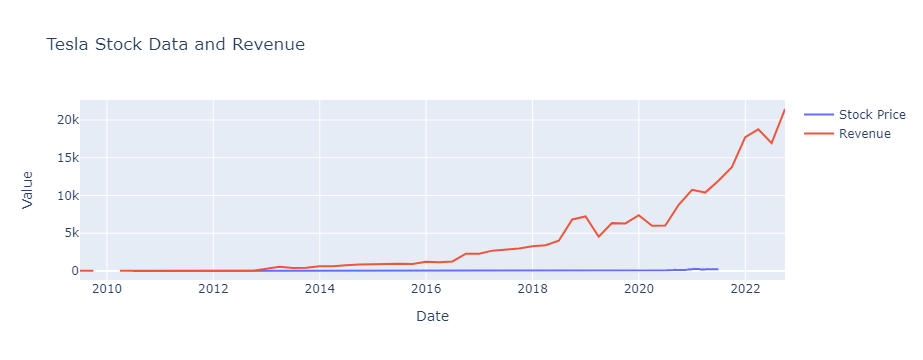

In [17]:
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, title):
    # Filter data up to June 2021
    stock_data = stock_data[stock_data['Date'] <= '2021-06-30']
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=stock_data['Date'], y=stock_data['Close'], mode='lines', name='Stock Price'))
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], mode='lines', name='Revenue'))
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Value')
    fig.show()

# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Data and Revenue')


In [21]:
import yfinance as yf

# Create a ticker object for GameStop (GME)
ticker_symbol = 'GME'
gme_ticker = yf.Ticker(ticker_symbol)

# Extract historical stock information and save it in a DataFrame named gme_data
gme_data = gme_ticker.history(period='max')

# Display the first few rows of the gme_data DataFrame
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [22]:
import plotly.graph_objects as go

def make_graph(stock_data, revenue_data, title):
    # Filter data up to June 2021
    stock_data = stock_data[stock_data.index <= '2021-06-30']
    revenue_data = revenue_data[revenue_data['Date'] <= '2021-06-30']
    
    # Create the plot
    fig = go.Figure()
    
    # Add the stock data
    fig.add_trace(go.Scatter(x=stock_data.index, y=stock_data['Close'], mode='lines', name='Stock Price'))
    
    # Add the revenue data
    fig.add_trace(go.Scatter(x=revenue_data['Date'], y=revenue_data['Revenue'], mode='lines', name='Revenue'))
    
    # Update layout
    fig.update_layout(title=title, xaxis_title='Date', yaxis_title='Value')
    
    # Show the plot
    fig.show()

# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')


KeyError: 'Date'